## Ćwiczenie 4. Celem ćwiczenia jest praktyczne wypróbowanie działania filtrów w celu wyeliminowania niepożądanych zakłóceń z sygnału EKG.

Biblioteki używane dla wykonania tego ćwiczenia:

In [32]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.signal import butter, freqz, filtfilt

### 1. Wczytaj sygnał ekg noise.txt i zauważ zakłócenia nałożone na sygnał. Wykreślić częstotliwościową charakterystykę amplitudową sygnału.

W poniższym kodzie wczytujemy sygnał EKG z pliku tekstowego "ekg_noise.txt" za pomocą funkcji *pd.read_csv()* z biblioteki pandas. Plik zawiera dwie kolumny: **czas** oraz **wartość amplitudy** sygnału. Wykres przedstawia sygnał EKG z zakłóceniami, które są widoczne jako fluktuacje amplitudy w czasie.

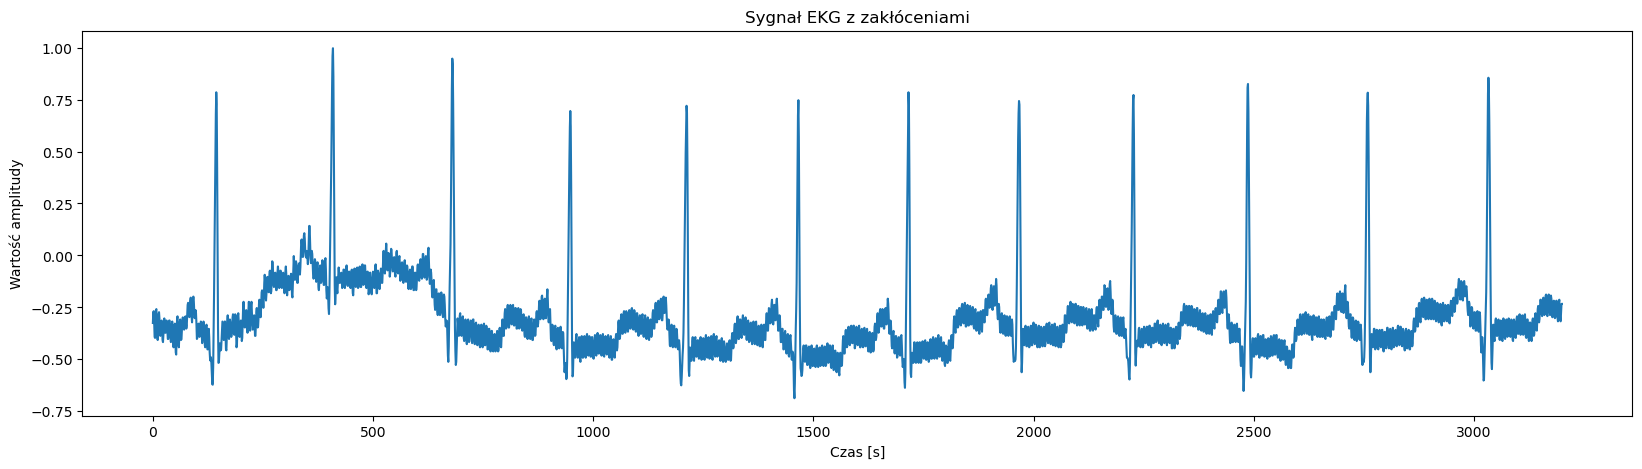

In [2]:
ekg_noise = pd.read_csv('ekg_noise.txt', names=['Czas', 'Wartość amplitudy'], sep=r'\s+') # wczytanie sygnału ekg_noise

plt.figure(figsize=(20,5))

plt.plot(ekg_noise.index, ekg_noise['Wartość amplitudy'], label='Sygnał z zakłóceniami') # wyrysowanie wykresu

plt.title('Sygnał EKG z zakłóceniami')
plt.xlabel('Czas [s]')
plt.ylabel('Wartość amplitudy')
plt.show()

Dalszym krokiem należało wykreślić częstotliwościową charakterystykę amplitudową sygnału. Dla tego została użyta **transformacja Fouriera** za pomocą funkcji *np.fft.rfft()*, która oblicza dyskretną transformatę Fouriera (DFT) tylko dla dodatnich częstotliwości, ponieważ sygnał jest rzeczywisty, a jego widmo jest symetryczne. Aby uzyskać amplitudę, obliczamy moduł współczynników transformacji za pomocą funkcji *np.abs()*, a następnie dzielimy przez długość sygnału, aby znormalizować amplitudę. Dla poprawności wyników, amplitudy częstotliwości, poza zerową, są mnożone przez 2, aby uwzględnić symetrię widma. Do obliczenia częstotliwości, odpowiadających poszczególnym współczynnikiem transformacji, używamy funkcji *np.fft.rfftfreq()*, która generuje tablicę częstotliwości na podstawie liczby próbek i częstotliwości próbkowania. Na koniec, wykres przedstawia **częstotliwościową charakterystykę amplitudową** sygnału, pokazując, jak amplitudy rozkładają się w funkcji częstotliwości.

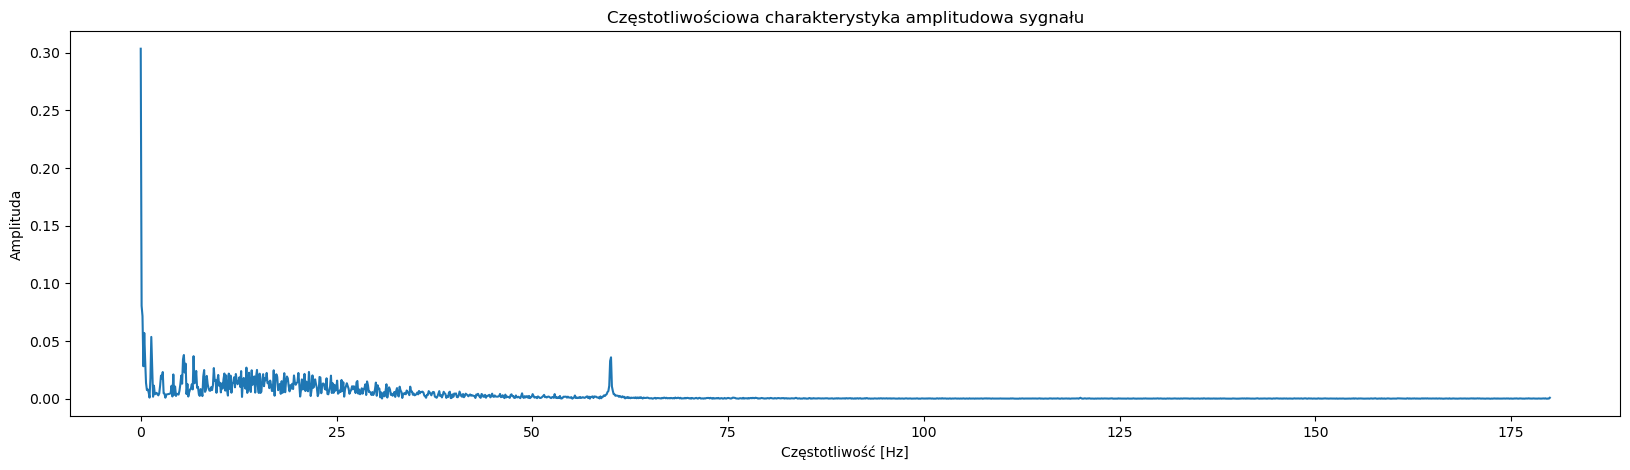

In [3]:
sampling_frequency_ekg_noise = 360  # ustawienie częstotliwości próbkowania
signal = ekg_noise['Wartość amplitudy']  # wartości amplitud EKG

fft_signal = np.fft.rfft(signal) # Wykonanie transformację Fouriera tylko dla częstotliwości dodatnich

amplitude_spectrum = np.abs(fft_signal) / len(signal)
amplitude_spectrum[1:] *= 2

frequencies = np.fft.rfftfreq(len(signal), 1/sampling_frequency_ekg_noise) # wyznaczenie częstotliwosciowej charakterystyki amplitudowej

plt.figure(figsize=(20, 5))
plt.plot(frequencies, amplitude_spectrum)
plt.title('Częstotliwościowa charakterystyka amplitudowa sygnału')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.show()


### 2. a) Zbadaj filtr dolnoprzepustowy o częstotliwości granicznej 60 Hz w celu redukcjizakłóceń pochodzących z sieci zasilającej. Wyznacz przebieg sygnału po filtracji oraz jego widmo.

W poniższym fragmencie kodu zastosowano dolnoprzepustowy **filtr Butterwortha** o częstotliwości granicznej 60 Hz, aby usunąć zakłócenia. Filtr został zaprojektowany z użyciem funkcji *butter()* i zastosowany do sygnału EKG za pomocą funkcji filtfilt(), co pozwoliło wyeliminować szumy. Na pierwszym wykresie pokazano sygnał po filtracji w dziedzinie czasu, a na drugim – jego widmo amplitudowe, czyli rozkład częstotliwości w analizowanym sygnale po filtracji.

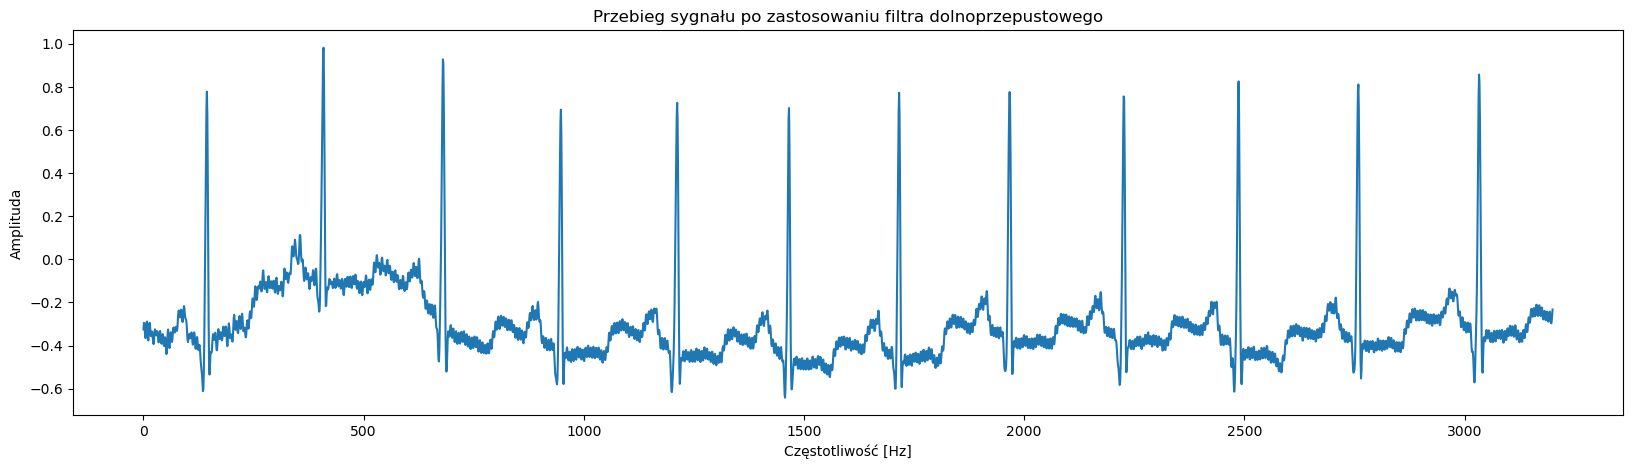

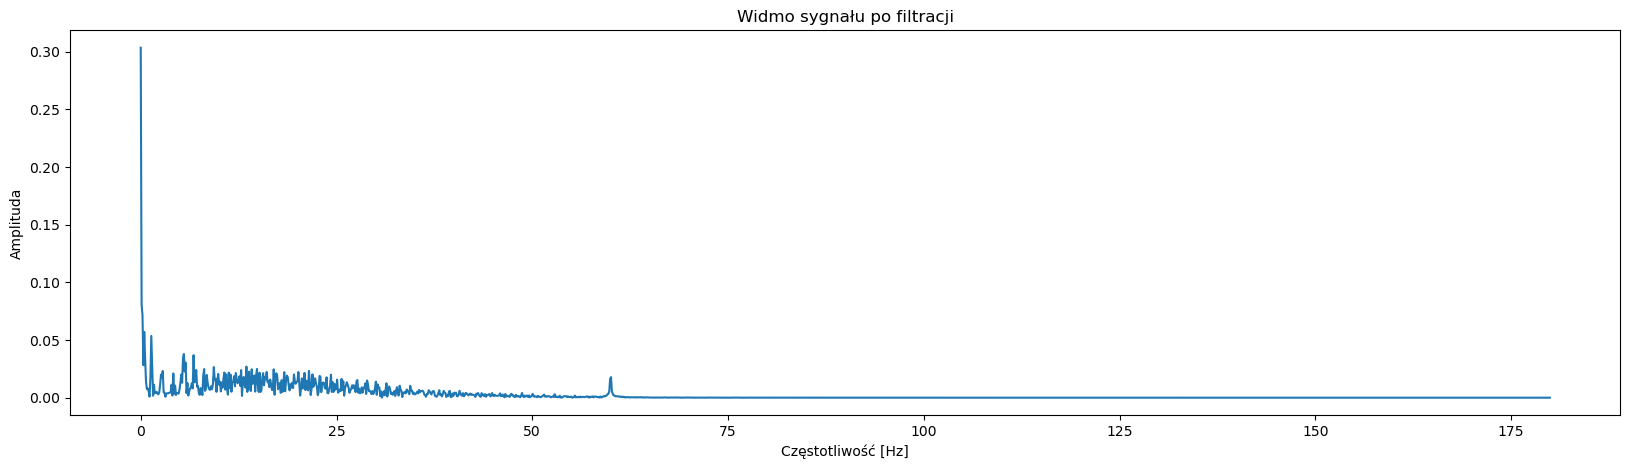

In [37]:
# Projektowanie filtra dolnoprzepustowego Butterwortha
cutoff_frequency = 60 # Ustawienie częstotliwości granicznej 
nyquist = 0.5 * sampling_frequency_ekg_noise  # Częstotliwość Nyquista
normal_cutoff = cutoff_frequency / nyquist  # Normalizowanie częstotliwości granicznej

# Projektowanie filtra Butterwortha (rząd filtra: 4)
b, a = butter(4, normal_cutoff, btype='low')

# Zastosowanie filtra dolnoprzepustowego
filtered_signal = filtfilt(b, a, signal)

plt.figure(figsize=(20, 5))
plt.plot(filtered_signal)
plt.title('Przebieg sygnału po zastosowaniu filtra dolnoprzepustowego')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.show()

# Widmo sygnału po filtracji
filtered_fft = np.abs(np.fft.rfft(filtered_signal)) / len(filtered_signal)
filtered_fft[1:] *= 2 

frequencies = np.fft.rfftfreq(len(filtered_signal), 1 / sampling_frequency_ekg_noise)

plt.figure(figsize=(20, 5))
plt.plot(frequencies, filtered_fft)
plt.title('Widmo sygnału po filtracji')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.show()

### b) Wykreśl zależność tłumienia od częstotliwości

Kolejnym krokiem wyznaczono charakterystykę częstotliwościową filtra Butterwortha, aby zobrazować zależność tłumienia od częstotliwości. Funkcja *freqz()* oblicza odpowiedź częstotliwościową filtra, a następnie wartości zostały przeskalowane do jednostek Hz oraz przeliczone na decybele (dB), co ułatwia ocenę skuteczności tłumienia. Na wykresie przedstawiono, jak zmienia się tłumienie w zależności od częstotliwości – widoczne jest stopniowe **wygaszanie sygnału** powyżej częstotliwości granicznej 60 Hz, co potwierdza prawidłowe działanie filtra dolnoprzepustowego.

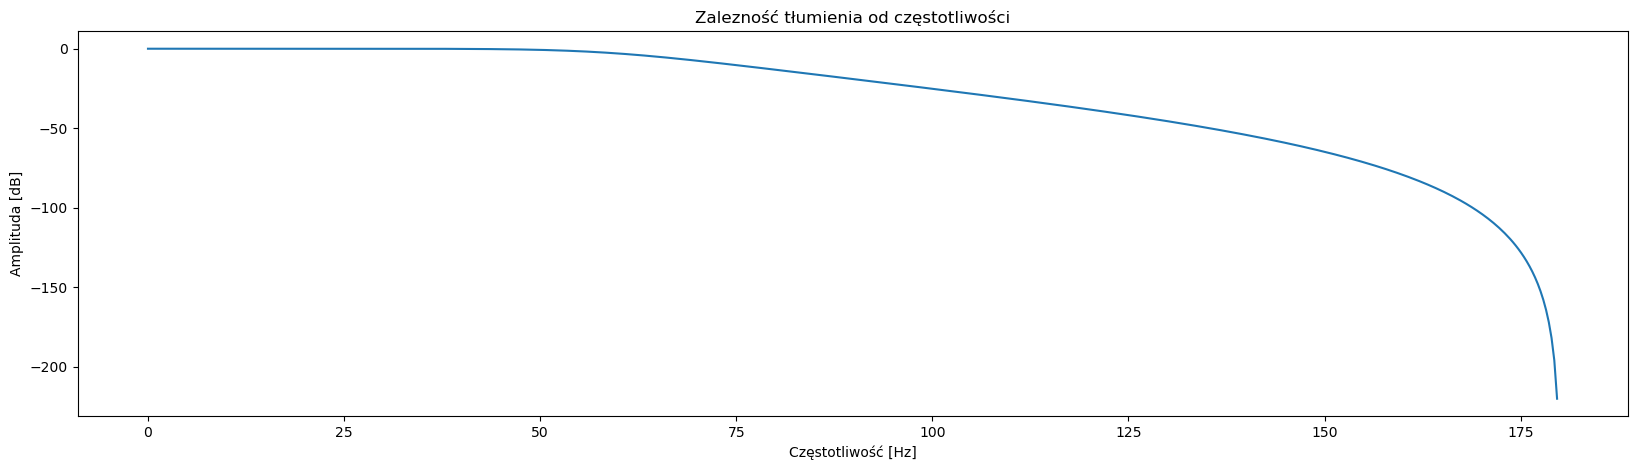

In [36]:
w,h = sig.freqz(b,a) # Charakterystyka częstotliwościowa filtra
x = w*sampling_frequency_ekg_noise / (2*np.pi)
y = 20*np.log10(abs(h))

plt.figure(figsize=(20,5))

plt.subplot(1, 1, 1)
plt.plot(x,y)
plt.title('Zalezność tłumienia od częstotliwości')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda [dB]')
plt.show()

### d) Wyznacz różnicę między sygnałem przed i po filtracji i widmo tej różnicy.

W tym fragmencie kodu obliczono różnicę między sygnałem oryginalnym a przefiltrowanym, co pozwala zaobserwować, które komponenty zostały usunięte przez filtr dolnoprzepustowy. Na pierwszym wykresie przedstawiono tę różnicę w dziedzinie czasu. Następnie wykonano transformatę Fouriera na sygnale różnicowym, aby uzyskać jego widmo amplitudowe. Dzięki temu można dokładnie zobaczyć, w jakim zakresie częstotliwości filtr usunął składniki.

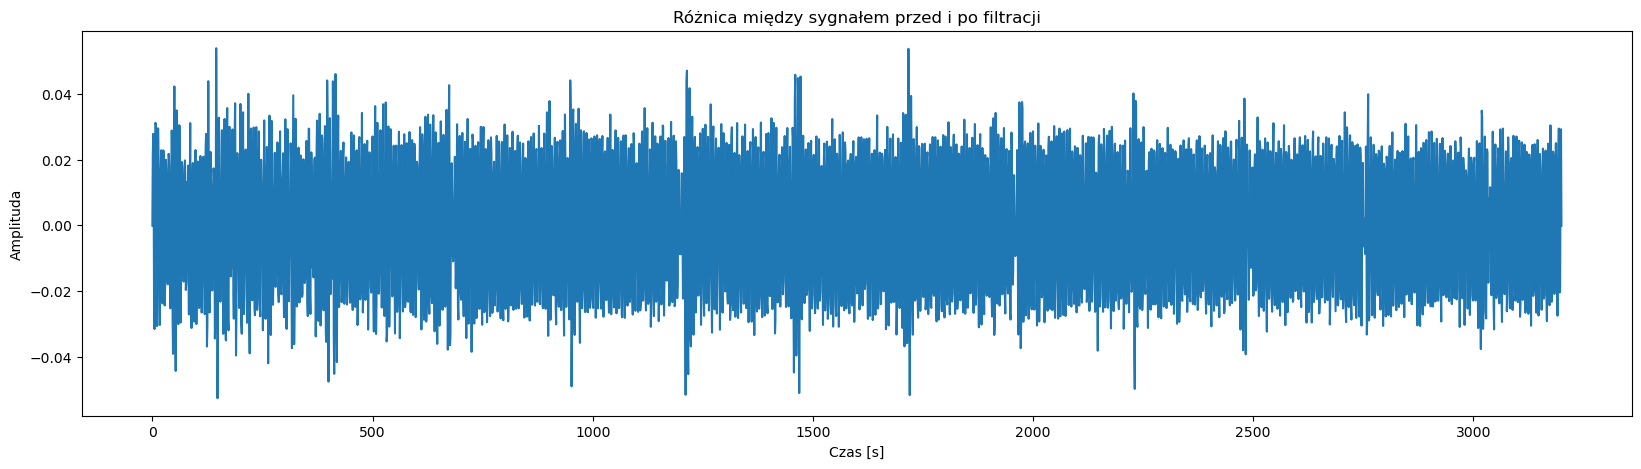

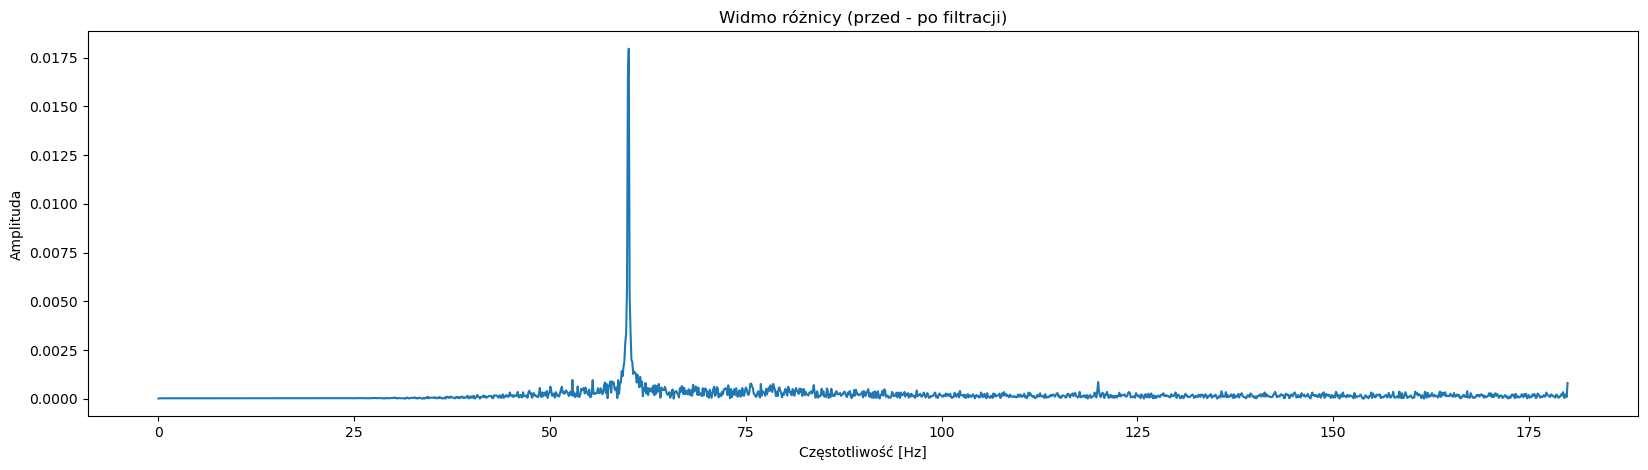

In [35]:
difference = signal - filtered_signal # Różnica między sygnałem przed i po filtracji

plt.figure(figsize=(20, 5))
plt.plot(difference)
plt.title('Różnica między sygnałem przed i po filtracji')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.show()

# Widmo różnicy (transformata Fouriera)
difference_fft = np.abs(np.fft.rfft(difference)) / len(difference)
difference_fft[1:] *= 2  # skalowanie

plt.figure(figsize=(20, 5))
plt.plot(frequencies, difference_fft)
plt.title('Widmo różnicy (przed - po filtracji)')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.show()

### Wnioski

Podczas tego ćwiczenia udało się zaobserwować obecność zakłóceń w sygnale EKG zapisanym w pliku ekg_noise.txt. Dzięki temu możliwe było zdobycie praktycznego doświadczenia w zakresie ich eliminacji poprzez zastosowanie filtra dolnoprzepustowego. W trakcie realizacji zadań udało się lepiej zrozumieć, jak działa transformata Fouriera oraz jak interpretować widmo sygnału. Ćwiczenie pozwoliło również przypomnieć sobie, jak korzystać z bibliotek NumPy, Matplotlib, Pandas oraz SciPy – narzędzi niezbędnych do analizy i przetwarzania danych sygnałowych. To doświadczenie pogłębiło umiejętność pracy z rzeczywistymi danymi oraz analizy ich zmian po filtracji.